# Raggruppamento automatizzato di emendamenti simili del disegno di legge zan

In questo elaborato vengono raggruppati e analizzati gli emendamenti simili
del disegno legge "zan" ed eliminate quelle superflue. 
Il disegno di legge Zan parla della regolamentazione delle unioni civili tra persone dello stesso sesso e disciplina delle convivenze.
Nell'ambito tecnico lo sviluppo è simile al file cirinna.ipynb cambia solo la fonte del sito "https://www.senato.it/leg/17/BGT/Schede/Ddliter/testi/46051_testi.htm" e la destinazione del file json chiamato EmandamentiZan.json

In [1]:
import os
import re
from itertools import combinations
import xml.etree.ElementTree as ET

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
%matplotlib inline

In [3]:
DATA_FOLDER = 'data/zan'
NAMESPACE = {'an': 'http://docs.oasis-open.org/legaldocml/ns/akn/3.0/CSD03'}
ALPHANUM_REGEX = re.compile('[\W+]', re.UNICODE)

In [4]:
def to_tokens(s):
    return set(ALPHANUM_REGEX.sub(' ', s).lower().split())

In [5]:
def jaccard_distance(x, y):    
    return 1 - (len(x['tokens'] & y['tokens']) / len(x['tokens'] | y['tokens']))

In [6]:
amendments = []

for filename in sorted(os.listdir(DATA_FOLDER)):
    if filename.startswith('.'):
        continue

    tree = ET.parse(os.path.join(DATA_FOLDER, filename))

    _id = tree.find('.//an:FRBRnumber', NAMESPACE).get('value')
    authors = [el.text for el in tree.findall('.//an:docProponent', NAMESPACE)]
    raw = ' '.join(tree.find('.//an:amendmentContent', NAMESPACE).itertext())
    tokens = to_tokens(raw)

    amendments.append({'_id': _id, 'authors': authors, 'raw': raw, 'tokens': tokens})

In [7]:
distances = [jaccard_distance(x, y) for x, y in combinations(amendments, 2)]
labels = [amendment['_id'] for amendment in amendments]

In [8]:
#aggiunti dopo
first_amendments = amendments[:100]
first_distances = [jaccard_distance(x, y) for x, y in combinations(first_amendments, 2)]

In [9]:
Z_all = linkage(distances, method='complete')

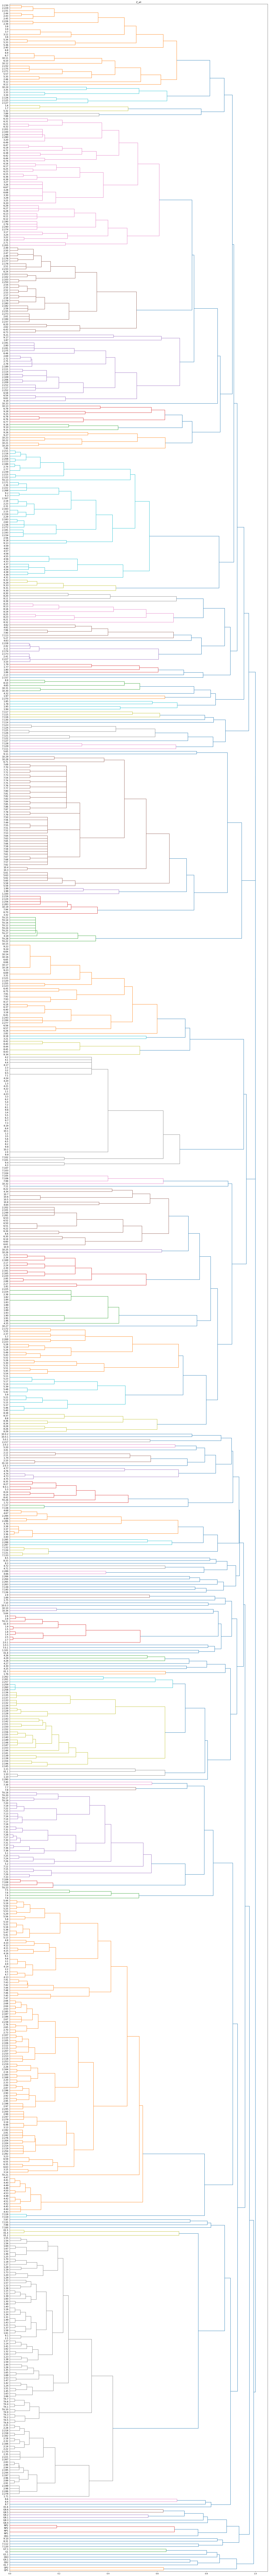

In [10]:
plt.figure(figsize=(25, 250))
plt.title('Z_all')
dendrogram(
    Z_all,
    labels=labels,
    orientation='right',
    leaf_font_size=12.,
)
plt.show()

In [11]:
for i in [77, 72, 68, 64, 60, 56, 52, 48, 92, 89, 84, 80, 96]:
    print('{i}: {snippet}'.format(i=i, snippet=first_amendments[i]['raw'][:76]))

77: Al comma 1, sopprimere la lettera d)
72: Il Senato, 
         in sede di discussione del disegno di legge A.S. 2005, 
68: Al comma 1, dopo le parole : «od opinioni»  inserire le seguenti : «la liber
64: Aggiungere in fine il seguente comma : 
         «1 -bis . Non è punibile l'
60: Al comma 1, sopprimere la lettera d).
56: All'articolo, premettere il seguente: 
 «Art. 01 
         1. All'articolo 6
52: All'articolo, premettere il seguente: 
 «Art. 01 
         1. La presente le
48: Premettere il seguente articolo: 
 «Art. 01 
 (Finalità) 
 1. La presente le
92: Al comma 1, capoverso «2 -bis », apportare le seguenti modifiche: 
         
89: Al comma 1, la lettera b), sostituire le parole:  «, religiosa o fondata sul
84: Al comma 1, sostituire le parole:  «oppure per motivi fondati sul sesso, sul
80: Al comma 1, lettera c) sostituire le parole:  «oppure fondati sul sesso, sul
96: Al comma 3, secondo periodo, dopo la parola : «scuole » aggiungere la seguen


In [12]:
for i in [78, 73, 69, 65, 61, 57, 53, 49, 93, 90, 85, 81]:
    print('{i}: {snippet}'.format(i=i, snippet=first_amendments[i]['raw'][:76]))

78: Al comma 1, lettera a) sostituire le parole:  «oppure fondati sul sesso, sul
73: Al comma 1 sostituire le parole : «sono fatte salve»  con le seguenti : «non
69: Dopo il comma 1, aggiungere il seguente : «1 -bis . Non costituisce discrimi
65: Aggiungere in fine il seguente comma: 
         «1 -bis . Non costituisce re
61: Aggiungere in fine il seguente comma: 
         «1 -bis . Non è punibile l'e
57: All'articolo, premettere il seguente: 
 «Art. 01 
 (Principi fondamentali) 

53: All'articolo, premettere il seguente: 
 «Art. 01 
         1. La presente le
49: Dopo il comma 1, aggiungere, in fine, il seguente : 
         «1 -bis . All'
93: Al comma 1, sostituire le parole:  «All'articolo 105 -quater , comma 2, del 
90: Al comma 1, sostituire le parole:  «o fondato sul sesso, sul genere, sull'or
85: Sopprimere l'articolo.
81: Al comma 1, lettera d) sostituire le parole:  «o fondati sul sesso, sul gene


In [13]:
import json
nameFile = "EmendamentiZan.json"
#print(first_amendments)
data_str = json.dumps(first_amendments, default=lambda x: list(x) if isinstance(x, set) else x)
with open(nameFile, "w") as outfile:
    outfile.write(data_str)

In [14]:
distances = [jaccard_distance(x, y) for x, y in combinations(amendments, 2)]

In [15]:
Z_all = linkage(distances, method='complete')

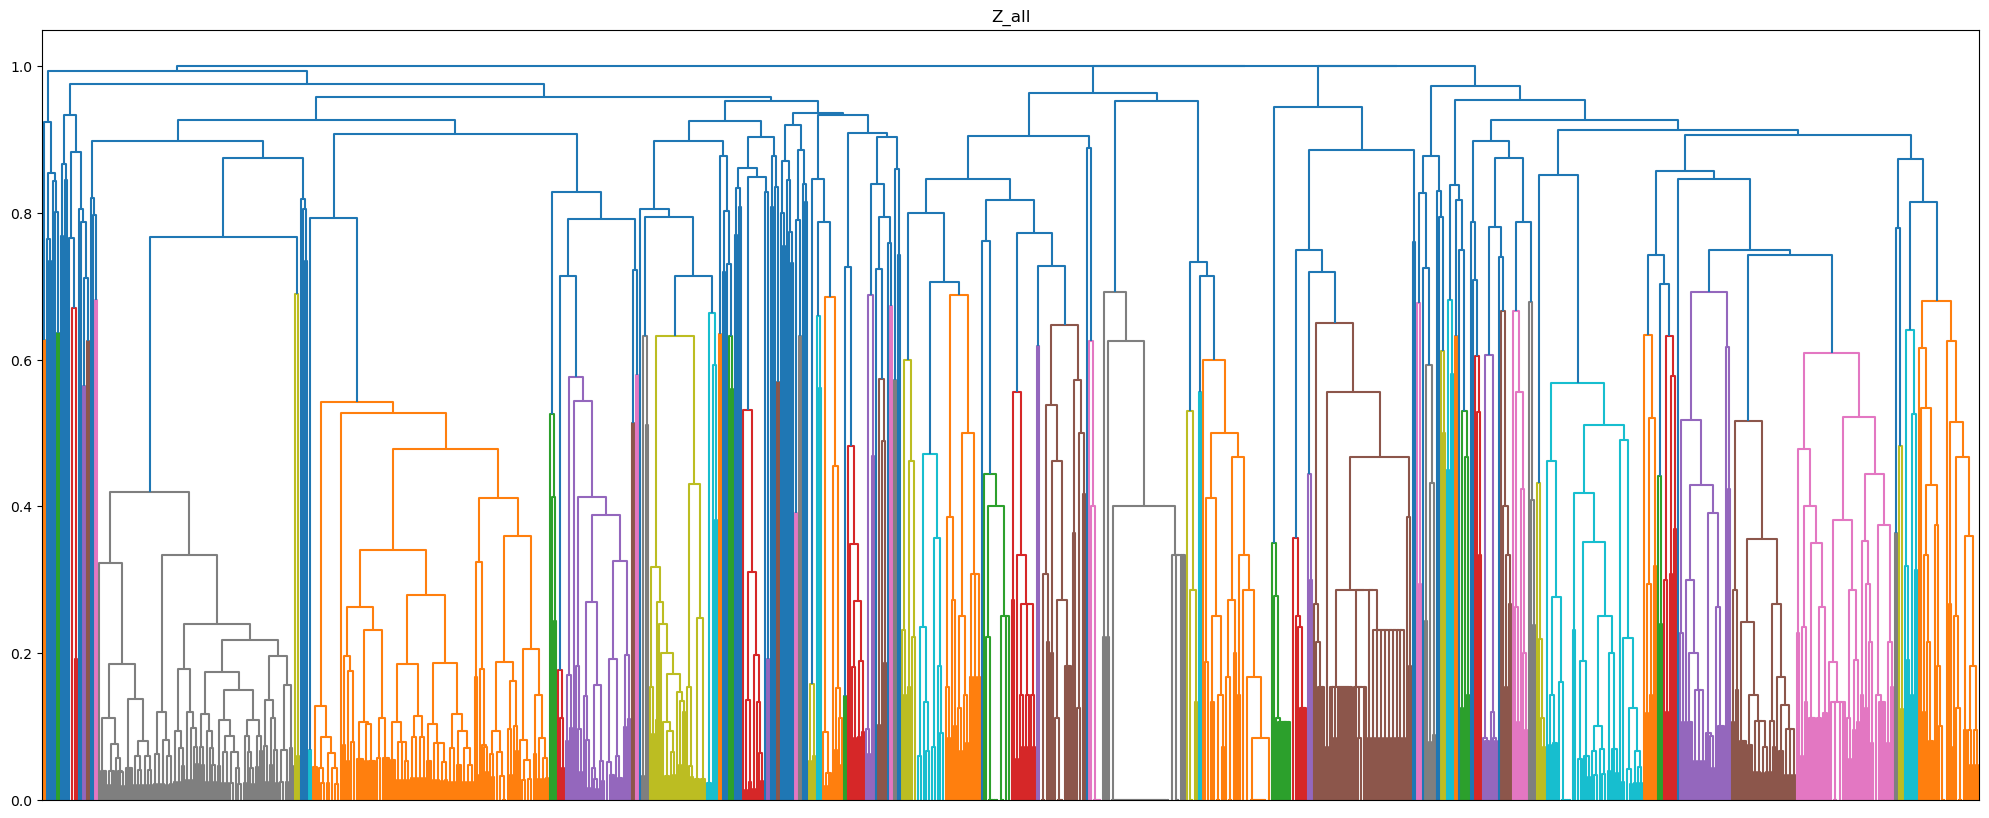

In [16]:
plt.figure(figsize=(25, 10))
plt.title('Z_all')
dendrogram(
    Z_all,
    no_labels=True,
)
plt.savefig('images/figuraZan.png') 
plt.show()
plt.close()